In [5]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../GP_Copilot_Webapp")
    
from copilot.langgraph_testing import *
from IPython.display import Image, display




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [7]:
get_model('llama-3.3').invoke('Hi')

ClientError: An error occurred (UnrecognizedClientException) when calling the Converse operation: The security token included in the request is invalid.

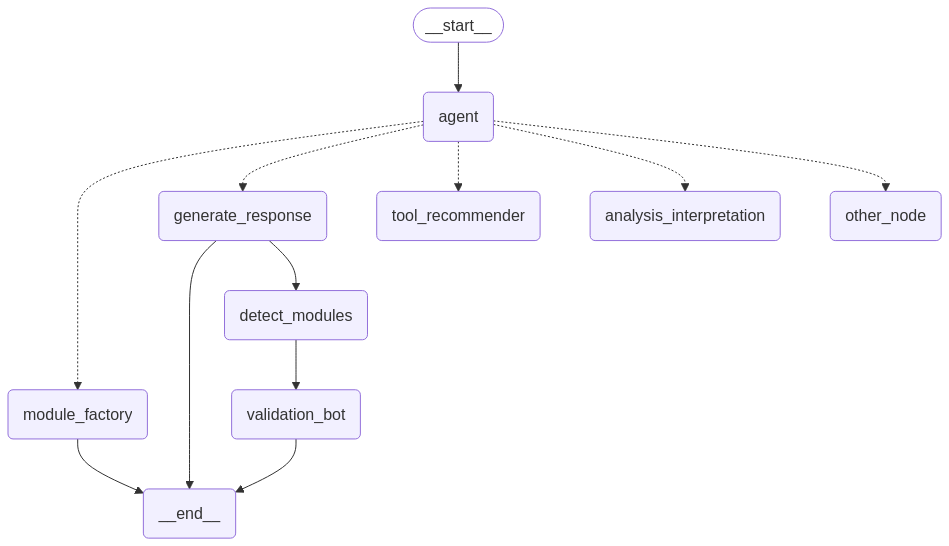

In [121]:
config = {
    "configurable": {
        "thread_id": "2",
        "model_type": "llama-mini",  # Example model type
        "retriever_path": "GP_Copilot/chroma",  # Example retriever
        "custom_system_prompt": "",
        "verbose": True
    }
}

user_msg = 'how do I view an umap plot?'
initial_state = {
    "session_id": "1",  # Assign a session ID (string format)
    "messages": [{"role": "user", "content": user_msg}],  # Ensure messages are a list
    'user_query' : 'Message Zero',
    "query_type": None,  # This will be populated by the `agent` node
    "query_info": {},  # This will be populated by `detect_modules`
    "model_type": "llama-3.3",  # Default model type
    "retriever_path": "GP_Copilot/chroma",  # Path for retriever
    "custom_system_prompt": "",  # Custom prompt if any
    "verbose": True,  # Debugging flag
    "extra_field": 0,  # Placeholder extra field
    "action": "",  # Placeholder, modify if needed
}
graph = get_graph()

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

# state = graph.invoke(initial_state, config)

In [158]:
user_msg = 'Walk me through the Seurat workflow in GenePattern, from start to finish, performing clustering and creating a UMAP image for my dataset.'
initial_state = {
    "session_id": "1",  # Assign a session ID (string format)
    "messages": [HumanMessage(content = user_msg)],  # Ensure messages are a list
    'user_query' : 'Message Zero',
    "query_type": None,  # This will be populated by the `agent` node
    "query_info": {},  # This will be populated by `detect_modules`
    "model_type": "llama-3.3",  # Default model type
    "retriever_path": "GP_Copilot/chroma",  # Path for retriever
    "custom_system_prompt": "",  # Custom prompt if any
    "verbose": True,  # Debugging flag
    "extra_field": 0,  # Placeholder extra field
    "action": "",  # Placeholder, modify if needed
}

config = {
    "configurable": {
        "thread_id": "2",
        "model_type": "llama-mini",  # Example model type
        "retriever_path": "GP_Copilot/chroma",  # Example retriever
        "custom_system_prompt": "",
        "verbose": True
    }
}


In [159]:
state = agent(initial_state)
state

---- Determining usage ----
user_query_classif='workflow_outlines'
----Query type: workflow_outlines----


{'query_type': 'workflow_outlines',
 'user_query': 'Walk me through the Seurat workflow in GenePattern, from start to finish, performing clustering and creating a UMAP image for my dataset.',
 'action': "---- Determining usage ----\nuser_query_classif='workflow_outlines'\n----Query type: workflow_outlines----\nwent through Agent \nagent categorized: workflow_outlines"}

In [160]:
state = generate_response(initial_state)

---- Generating Response ----


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_module_manifests found. Number of documents in collection: 155
Using llama-mini


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_module_documentations found. Number of documents in collection: 257
Using llama-mini
--- Docs retrieved ---
number of docs retrieved:  84


In [163]:
state

{'messages': ['I think these [Seurat.IntegrateData, Seurat.Clustering, STREAM.Plot2DVisualization] modules will help.'],
 'action': "---- Determining usage ----\nuser_query_classif='workflow_outlines'\n----Query type: workflow_outlines----\nwent through Agent \n---- Generating Response ----\n--- Docs retrieved ---\nnumber of docs retrieved: 84\nwent through generate responses"}

In [164]:
initial_state

{'session_id': '1',
 'messages': [HumanMessage(content='Walk me through the Seurat workflow in GenePattern, from start to finish, performing clustering and creating a UMAP image for my dataset.', additional_kwargs={}, response_metadata={})],
 'user_query': 'Walk me through the Seurat workflow in GenePattern, from start to finish, performing clustering and creating a UMAP image for my dataset.',
 'query_type': 'workflow_outlines',
 'query_info': {},
 'model_type': 'llama-3.3',
 'retriever_path': 'GP_Copilot/chroma',
 'custom_system_prompt': '',
 'verbose': True,
 'extra_field': 0,
 'action': "---- Determining usage ----\nuser_query_classif='workflow_outlines'\n----Query type: workflow_outlines----\nwent through Agent \n---- Generating Response ----\n--- Docs retrieved ---\nnumber of docs retrieved: 84\n"}

In [ ]:
state = detect_modules(initial_state)

In [5]:
# Initialize an empty ChromaDB client
path = 'GP_Copilot/chroma'
client = chromadb.PersistentClient(path=path)

In [9]:
## validate that docs are there:
for col in ['genepattern_guide', 'genepattern_modules', 'genepattern_threads']:
    get_vector_store(path, col)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_guide found. Number of documents in collection: 280


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_modules found. Number of documents in collection: 896


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_threads found. Number of documents in collection: 902


In [16]:
ret = get_vector_store(path, 'genepattern_modules').as_retriever(search_kwargs = {'filter' : {'document_type' : 'documentation'}})
ret

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_modules found. Number of documents in collection: 896


VectorStoreRetriever(tags=['Chroma', 'FastEmbedEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x314bc8b10>, search_kwargs={'filter': {'document_type': 'documentation'}})

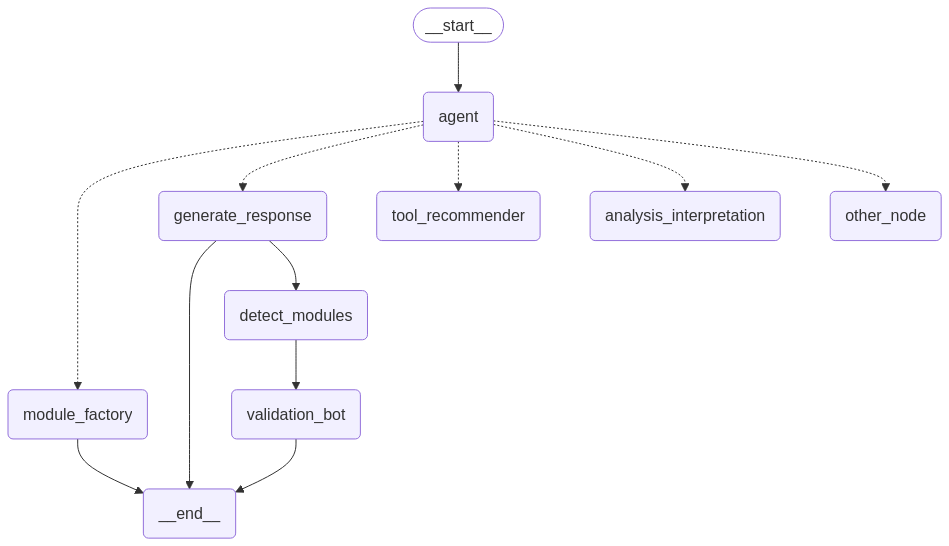

In [25]:
config = {
    "configurable": {
        "thread_id": "2",
        "model_type": "llama-mini",  # Example model type
        "retriever_path": "GP_Copilot/chroma",  # Example retriever
        "custom_system_prompt": "",
        "verbose": True
    }
}

user_msg = 'how do I view an umap plot using seurat?'
initial_state = {
    "session_id": "1",  # Assign a session ID (string format)
    "messages": [{"role": "user", "content": user_msg}],  # Ensure messages are a list
    'user_query' : 'Message Zero',
    "query_type": None,  # This will be populated by the `agent` node
    "query_info": {},  # This will be populated by `detect_modules`
    "model_type": "llama-3.3",  # Default model type
    "custom_system_prompt": "",  # Custom prompt if any
    "verbose": True,  # Debugging flag
    "extra_field": 0,  # Placeholder extra field
    "action": "",  # Placeholder, modify if needed
}
graph = get_graph()

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

# state = graph.invoke(initial_state, config)




In [47]:
state = generate_response(initial_state)
print(state['messages'][-1])

---- Generating Response ----
chroma


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Vector store: genepattern_modules found. Number of documents in collection: 872
Using llama-mini
--- Docs retrieved ---
number of docs retrieved:  40
Based on the context and the user's query about viewing a UMAP plot using Seurat, I recommend the following GenePatterntern module:

Seurat.IntegrateData (urn:lsid:8080.gpserver.ip-172-31-26-71.ip-172-31-26-71.ec2.internal:genepatternmodules:941:1.3)

Key parameters for this module include:
1. input_files: Gene expression matrices or Seurat objects
2. use_batch_names: Map input files to batch numbers (default TRUE)
3. ncomps: Number of principal components for batch correction (default 50)
4. output_file__name for output files

While this module is primarily for batch correction,, Seurat workflows typically involve dimensionality reduction steps like UMAP. However, for a specific UMAP plot visualization, you might need to use additional R scripting or a custom Seurat module.

Recommendation: Contact the GenePattern team (gp-help@broadinst

In [31]:
detect_modules(state)

---- Detecting modules (if any) in user prompt. ----
Using AWS bedrock llama!, model: us.meta.llama3-3-70b-instruct-v1:0


AttributeError: 'str' object has no attribute 'content'

In [85]:
# retrieve_documents('GP_Copilot/chroma', 'rna-seq analysis', collection_name = 'my_vector_store')
# Helper function for printing docs


def pretty_print_docs(docs):
    print(
        f"\n{'-' * 100}\n".join(
            [f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]
        )
    )
    

In [141]:
collections = ['genepattern_guide','genepattern_module_manifests','genepattern_module_readmes','genepattern_module_wrappers','genepattern_module_documentations','genepattern_threads']

In [146]:
# from langchain.retrievers import ContextualCompressionRetriever
# from langchain.retrievers.document_compressors import LLMChainExtractor
# all_docs = []
# for col in collections:
#     print('-----------------------------------------------------------------------------------------')
#     print(f'LOOKING THROUGH {col} collection: ')
#     retriever = get_vector_store('GP_Copilot/chroma', col).as_retriever()
#     llm = get_model('llama-3.3')
#     compressed_docs = MultiQueryRetriever.from_llm(retriever = retriever, llm = get_model('llama-3.3')).invoke('how do I run the seurat pipeline? ')
#     all_docs += compressed_docs
#     pretty_print_docs(compressed_docs)

#     print('-----------------------------------------------------------------------------------------')

In [92]:
# get_vector_store('GP_Copilot/chroma', 'genepattern_modules').as_retriever().invoke('DESeq2 will create a confounding variable class file')

In [119]:
# retrieve_documents('GP_Copilot/chroma', 'seurat', collection_name = 'genepattern_module_documentations')